In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seb
import warnings

warnings.filterwarnings('ignore')
seb.set_style('whitegrid')

import os
from __future__ import division
from datetime import datetime

'''import missingno as msno # missing data visualization module for Python
import pandas_profiling
'''
import gc
import datetime

%matplotlib inline
color = sns.color_palette()

In [285]:
os.getcwd()

'F:\\Data Science\\#05 Python\\Python Assignment 2_BI_Pro2'

In [286]:
os.chdir("F:\Data Science\#05 Python\Python Assignment 2_BI_Pro2")

In [287]:
data = pd.read_csv("Ecommerce - UK Retailer.csv")

In [288]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [289]:
# change the invoice_date format - String to Timestamp format
data['InvoiceDate'] = pd.to_datetime(df.InvoiceDate, format='%m/%d/%Y %H:%M')

In [290]:
# change description - UPPER case to LOWER case
data['Description'] = data.Description.str.lower()

In [291]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# Data Cleaning

In [323]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


# 1. Perform Basic Exploratory Data Analysis

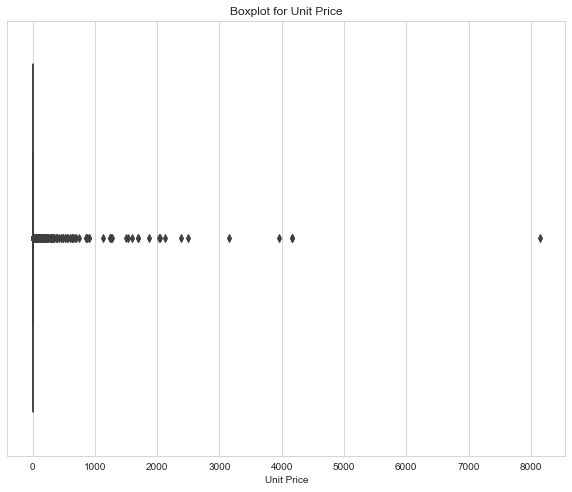

In [376]:
#a. Boxplot - All numeric Values 
plt.subplots(figsize=(10,8))
sns.boxplot(df_new.UnitPrice)

plt.xlabel('Unit Price')
plt.title('Boxplot for Unit Price')
plt.show()

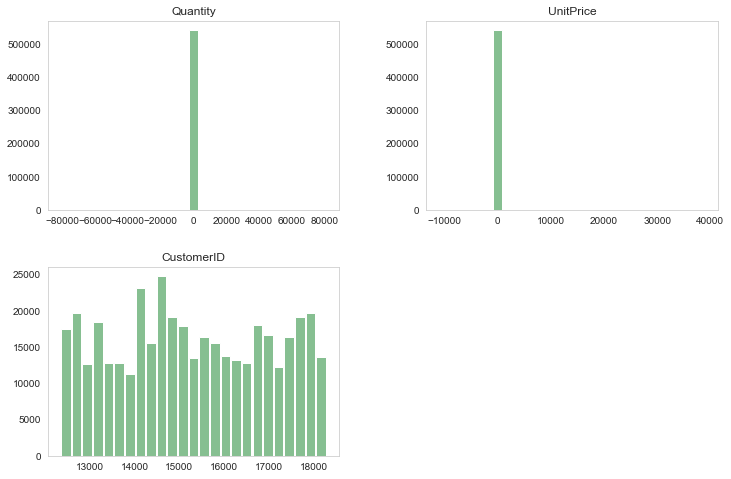

In [379]:
#b. Histogram - All Numeric Variables
Histogram = data.hist(column=['Quantity', 'UnitPrice', "CustomerID"],bins=25,grid=False,figsize = (12,8),color='#86bf91',zorder=2,rwidth=0.9)
Histogram = Histogram[0]

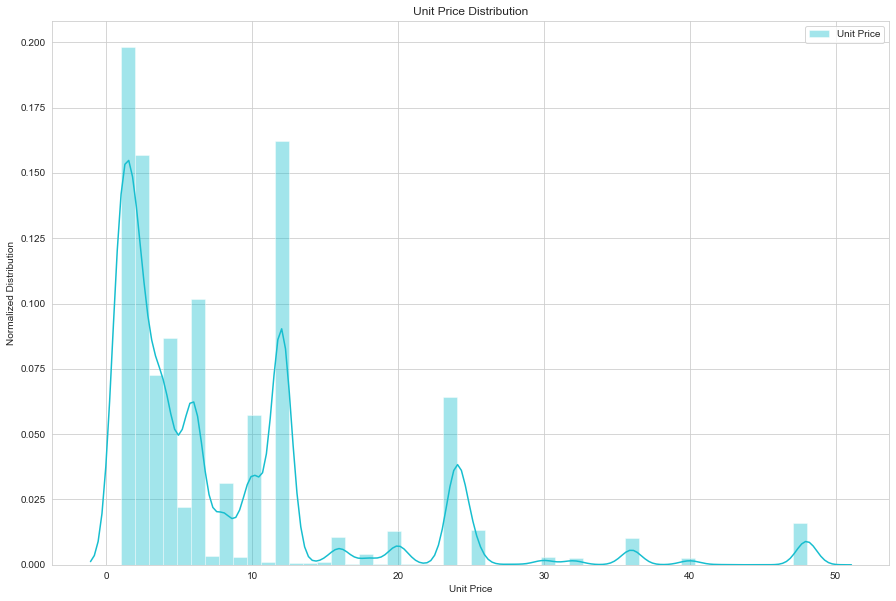

In [377]:
#C. Distribution Plot - All NUmberic Varicables
# Unit price distribition plot qunatity less than 50
plt.subplots(figsize=(15,10))
sns.distplot(df_new.Quantity[df.Quantity < 50], label='Unit Price',color=color[9]).legend()

plt.xlabel('Unit Price')
plt.ylabel('Normalized Distribution')
plt.title('Unit Price Distribution')
plt.show()

In [380]:
#d. Aggregation for all numerical Columns 
data.aggregate({ "Quantity": ['sum','min','max'],
                 "UnitPrice":['max', 'min','sum'],
                 "CustomerID":['min', 'sum','max']
               })

,Quantity,UnitPrice,CustomerID
sum,5176450,2498803.974,6.219476e+09
min,-80995,-11062.060,1.234600e+04
max,80995,38970.000,1.828700e+04


In [381]:
##e. Unique Values across all columns 
data.describe(include='all').loc['unique', :]

InvoiceNo      25900
StockCode       4070
Description     4206
Quantity         NaN
InvoiceDate    23260
UnitPrice        NaN
CustomerID       NaN
Country           38
Name: unique, dtype: object

In [382]:
##f. Duplicate values across all columns
idx = pd.Index(['InvoiceNo', 'StockCode ', 'Description', 'Quantity', 'InvoiceDate ','UnitPrice','CustomerID','Country'])
idx.duplicated(keep='first') ##just for checking 
idx.duplicated()

array([False, False, False, False, False, False, False, False])

It shows that there is no duplicate value in this columns

In [383]:
# create dataset only with numerical variable
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdata = data.select_dtypes(include=numerics)

In [384]:
newdata

,Quantity,UnitPrice,CustomerID
0,6,2.55,17850.0
1,6,3.39,17850.0
2,8,2.75,17850.0
3,6,3.39,17850.0
4,6,3.39,17850.0
...,...,...,...
541904,12,0.85,12680.0
541905,6,2.10,12680.0
541906,4,4.15,12680.0
541907,4,4.15,12680.0


In [385]:
datanew=data.select_dtypes(exclude=["number","bool_",])

In [305]:
datanew

,InvoiceNo,StockCode,Description,InvoiceDate,Country
0,536365,85123A,white hanging heart t-light holder,2010-12-01 08:26:00,United Kingdom
1,536365,71053,white metal lantern,2010-12-01 08:26:00,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,2010-12-01 08:26:00,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,2010-12-01 08:26:00,United Kingdom
4,536365,84029E,red woolly hottie white heart.,2010-12-01 08:26:00,United Kingdom
...,...,...,...,...,...
541904,581587,22613,pack of 20 spaceboy napkins,2011-12-09 12:50:00,France
541905,581587,22899,children's apron dolly girl,2011-12-09 12:50:00,France
541906,581587,23254,childrens cutlery dolly girl,2011-12-09 12:50:00,France
541907,581587,23255,childrens cutlery circus parade,2011-12-09 12:50:00,France


In [306]:
datanew['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 541909, dtype: datetime64[ns]

In [307]:
data.corr()

,Quantity,UnitPrice,CustomerID
Quantity,1.000000,-0.001235,-0.00360
UnitPrice,-0.001235,1.000000,-0.00456
CustomerID,-0.003600,-0.004560,1.00000


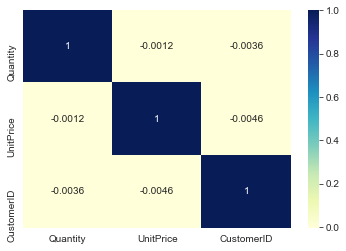

In [308]:
#g. Correlation – Heatmap - All Numeric Variables 
Heatmap = seb.heatmap(newdata.corr(),cmap="YlGnBu",  annot=True)
plt.show()

In [28]:
#h. Regression Plot - All Numeric Variables
#seb.regplot(x ='UnitPrice', y ='Quantity', data = newdata)

In [ ]:
#seb.regplot(x ='Quantity', y ='CustomerID', data = newdata)

In [ ]:
##Bar Plot – Every Categorical Variable vs every Numerical Variable 

##seb.catplot(x="InvoiceNo", y="Quantity", kind="box", data=data)

In [ ]:
#data_new=data["InvoiceDate"] = pd.to_numeric(data["InvoiceDate"], downcast="float")
#data_new

In [25]:
np.isnan(newdata).any()

Quantity      False
UnitPrice     False
CustomerID     True
dtype: bool

remove NA from CustomerID     to plot pair plot

# Q2. Check for missing values in all columns and replace them with the appropriate metric(Mean/Median/Mode)

In [326]:
## check missing values for each column 
data.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

In [310]:
# check out the rows with missing values
data[data.isnull().any(axis=1)].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,decorative rose bathroom bottle,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,decorative cats bathroom bottle,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,polkadot rain hat,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,rain poncho retrospot,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom


# Remove Rows with missing values

In [311]:
# df_new without missing values
df_new = data.dropna()

In [312]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [313]:
# check missing values for each column 
df_new.isnull().sum().sort_values(ascending=False)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

# 3. Remove duplicate rows

In [314]:
result_data = df_new.drop_duplicates
print('Result DataFrame:\n', result_data)

Result DataFrame:
 <bound method DataFrame.drop_duplicates of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   white hanging heart t-light holder         6   
1         536365     71053                  white metal lantern         6   
2         536365    84406B       cream cupid hearts coat hanger         8   
3         536365    84029G  knitted union flag hot water bottle         6   
4         536365    84029E       red woolly hottie white heart.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          pack of 20 spaceboy napkins        12   
541905    581587     22899         children's apron dolly girl          6   
541906    581587     23254        childrens cutlery dolly girl          4   
541907    581587     23255      childrens cutlery circus parade         4   
541908    581587     22138        baking set 9 piece retrospot          3   

             

In [324]:
# change columns type - String to Int type 
df_new['CustomerID'] = df_new['CustomerID'].astype('int64')

In [325]:
df_new.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [317]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int64         
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.9+ MB


In [318]:
df_new.describe().round(2)

,Quantity,UnitPrice,CustomerID
count,406829.00,406829.00,406829.00
mean,12.06,3.46,15287.69
std,248.69,69.32,1713.60
min,-80995.00,0.00,12346.00
25%,2.00,1.25,13953.00
50%,5.00,1.95,15152.00
75%,12.00,3.75,16791.00
max,80995.00,38970.00,18287.00


# 4. Remove rows which have negative values in Quantity column 

In [319]:
df_new = df_new[df_new.Quantity > 0] #Values less than 0 Will be negative

In [320]:
df_new.describe().round(2)

,Quantity,UnitPrice,CustomerID
count,397924.00,397924.00,397924.00
mean,13.02,3.12,15294.32
std,180.42,22.10,1713.17
min,1.00,0.00,12346.00
25%,2.00,1.25,13969.00
50%,6.00,1.95,15159.00
75%,12.00,3.75,16795.00
max,80995.00,8142.75,18287.00


Result: We have removed the negative value from quantity column

## Add the column - amount_spent

In [329]:
df_new['amount_spent'] = df_new['Quantity'] * df_new['UnitPrice']

In [330]:
# rearrange all the columns for easy reference
df_new = df_new[['InvoiceNo','StockCode','Description','Quantity','UnitPrice','InvoiceDate','amount_spent','CustomerID','Country']]

In [331]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     397924 non-null  object        
 1   StockCode     397924 non-null  object        
 2   Description   397924 non-null  object        
 3   Quantity      397924 non-null  int64         
 4   UnitPrice     397924 non-null  float64       
 5   InvoiceDate   397924 non-null  datetime64[ns]
 6   amount_spent  397924 non-null  float64       
 7   CustomerID    397924 non-null  int64         
 8   Country       397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 30.4+ MB


# 5. Add the columns - Month, Day and Hour for the invoice 

In [332]:
df_new.insert(loc=6, column='year_month', value=df_new['InvoiceDate'].map(lambda x: 100*x.year + x.month))
df_new.insert(loc=7, column='month', value=df_new.InvoiceDate.dt.month)# +1 to make Monday=1.....until Sunday=7
df_new.insert(loc=8, column='day', value=(df_new.InvoiceDate.dt.dayofweek)+1)
df_new.insert(loc=9, column='hour', value=df_new.InvoiceDate.dt.hour)


In [333]:
df_new.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,InvoiceDate,year_month,month,day,hour,amount_spent,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,6,2.55,2010-12-01 08:26:00,201012,12,3,8,15.30,17850,United Kingdom
1,536365,71053,white metal lantern,6,3.39,2010-12-01 08:26:00,201012,12,3,8,20.34,17850,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2.75,2010-12-01 08:26:00,201012,12,3,8,22.00,17850,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,3.39,2010-12-01 08:26:00,201012,12,3,8,20.34,17850,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,3.39,2010-12-01 08:26:00,201012,12,3,8,20.34,17850,United Kingdom


# 6. How many orders made by the customers?

In [334]:
df_new.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count().head()

,CustomerID,Country,InvoiceNo
0,12346,United Kingdom,1
1,12347,Iceland,182
2,12348,Finland,31
3,12349,Italy,73
4,12350,Norway,17


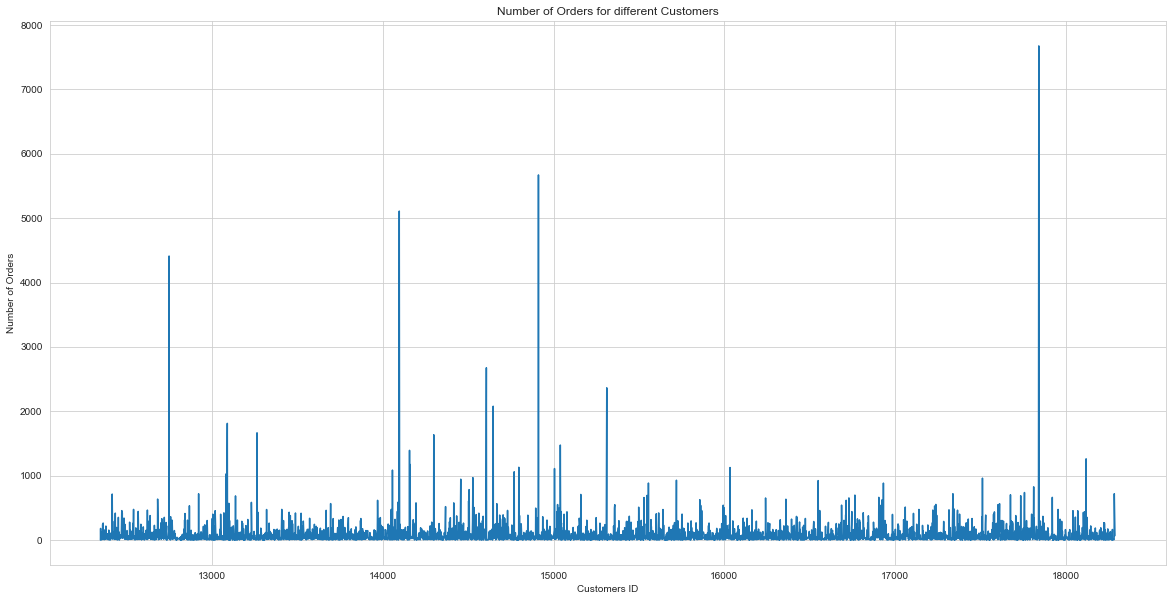

In [335]:
plt.subplots(figsize=(20,10))
plt.plot(orders.CustomerID, orders.InvoiceNo)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

# 7. Top 5 customers with higher number of orders

In [338]:
print('The Top 5 customers with most number of orders')
orders.sort_values(by='InvoiceNo', ascending=False).head()

The Top 5 customers with most number of orders


,CustomerID,Country,InvoiceNo
4019,17841,United Kingdom,7676
1888,14911,EIRE,5672
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4413
1670,14606,United Kingdom,2677


# 8. How much money spent by the customers?

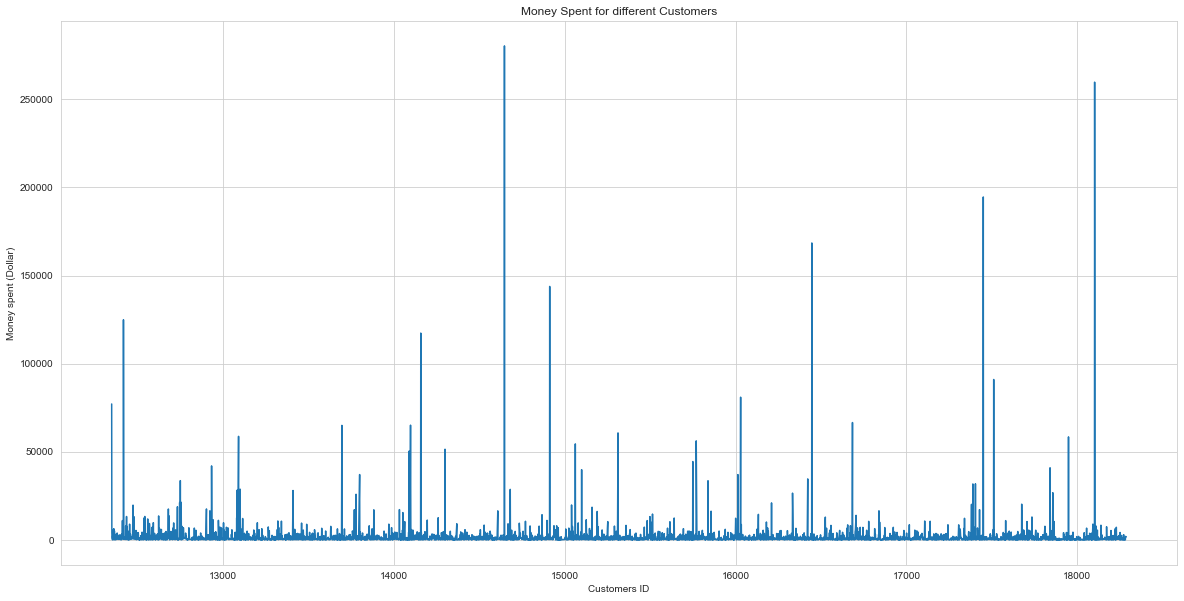

In [340]:
money_spent = df_new.groupby(by=['CustomerID','Country'], as_index=False)['amount_spent'].sum()

plt.subplots(figsize=(20,10))
plt.plot(money_spent.CustomerID, money_spent.amount_spent)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()

# 9. TOP 5 customers with highest money spent

In [341]:
print('The Top 5 customers with highest money spent')
money_spent.sort_values(by='amount_spent', ascending=False).head()

The Top 5 customers with highest money spent


,CustomerID,Country,amount_spent
1698,14646,Netherlands,280206.02
4210,18102,United Kingdom,259657.30
3737,17450,United Kingdom,194550.79
3017,16446,United Kingdom,168472.50
1888,14911,EIRE,143825.06


# 10. How many orders per month?

In [342]:
df_new.groupby("month").count()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,InvoiceDate,year_month,day,hour,amount_spent,CustomerID,Country
month,,,,,,,,,,,,
1,21232,21232,21232,21232,21232,21232,21232,21232,21232,21232,21232,21232
2,19928,19928,19928,19928,19928,19928,19928,19928,19928,19928,19928,19928
3,27177,27177,27177,27177,27177,27177,27177,27177,27177,27177,27177,27177
4,22644,22644,22644,22644,22644,22644,22644,22644,22644,22644,22644,22644
5,28322,28322,28322,28322,28322,28322,28322,28322,28322,28322,28322,28322
6,27185,27185,27185,27185,27185,27185,27185,27185,27185,27185,27185,27185
7,26827,26827,26827,26827,26827,26827,26827,26827,26827,26827,26827,26827
8,27013,27013,27013,27013,27013,27013,27013,27013,27013,27013,27013,27013
9,40030,40030,40030,40030,40030,40030,40030,40030,40030,40030,40030,40030


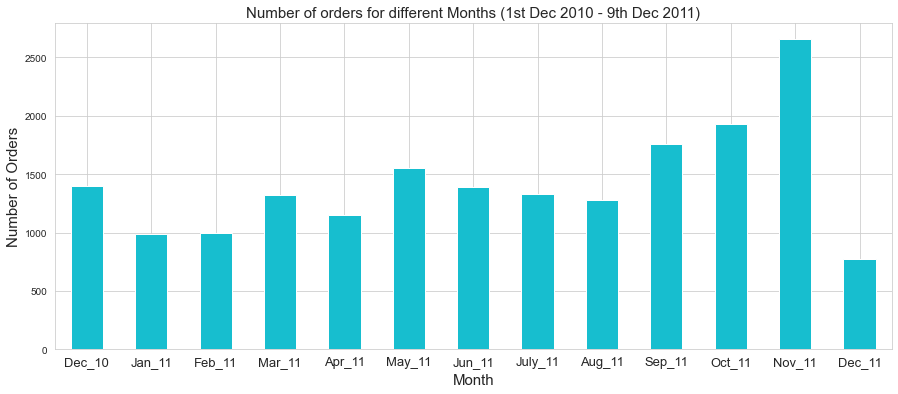

In [344]:
ax = df_new.groupby('InvoiceNo')['year_month'].unique().value_counts().sort_index().plot(kind='bar',color=color[9],figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

# 11. How many orders per day? 

In [343]:
df_new.groupby("day").count()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,InvoiceDate,year_month,month,hour,amount_spent,CustomerID,Country
day,,,,,,,,,,,,
1,64899,64899,64899,64899,64899,64899,64899,64899,64899,64899,64899,64899
2,66476,66476,66476,66476,66476,66476,66476,66476,66476,66476,66476,66476
3,68888,68888,68888,68888,68888,68888,68888,68888,68888,68888,68888,68888
4,80052,80052,80052,80052,80052,80052,80052,80052,80052,80052,80052,80052
5,54834,54834,54834,54834,54834,54834,54834,54834,54834,54834,54834,54834
7,62775,62775,62775,62775,62775,62775,62775,62775,62775,62775,62775,62775


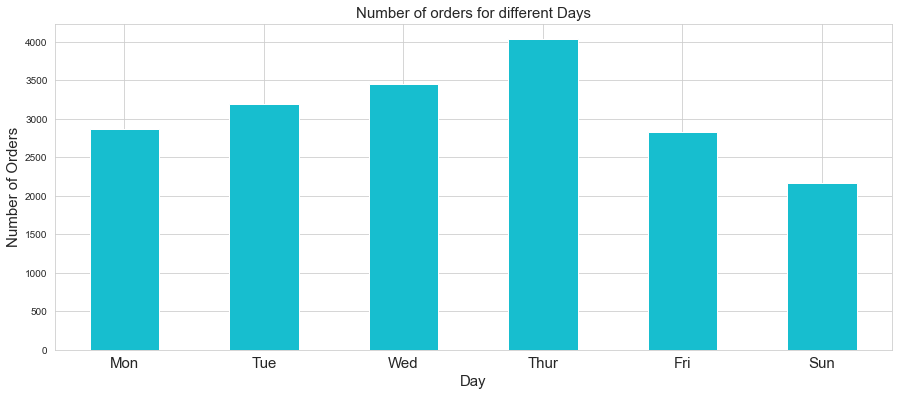

In [345]:
ax = df_new.groupby('InvoiceNo')['day'].unique().value_counts().sort_index().plot(kind='bar',color=color[9],figsize=(15,6))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Days',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

# 12. How many orders per hour?

In [360]:
orders_per_hour = df_new.groupby('hour')['Quantity'].count().sort_values()
orders_per_hour

hour
6         1
7       379
20      802
18     2929
19     3322
8      8691
17    13072
9     21945
16    24093
10    37999
15    45372
11    49092
14    54127
13    64031
12    72069
Name: Quantity, dtype: int64

# 13. How many orders for each country? 

In [355]:
group_country_orders = df_new.groupby('Country')['InvoiceNo'].count().sort_values()
group_country_orders

Country
Saudi Arabia                 9
Bahrain                     17
Czech Republic              25
Brazil                      32
Lithuania                   35
Lebanon                     45
RSA                         58
European Community          60
United Arab Emirates        68
Malta                      112
Greece                     145
Canada                     151
USA                        179
Iceland                    182
Singapore                  222
Unspecified                244
Israel                     248
Japan                      321
Poland                     330
Denmark                    380
Austria                    398
Sweden                     451
Cyprus                     614
Finland                    685
Channel Islands            748
Italy                      758
Norway                    1072
Australia                 1185
Portugal                  1462
Switzerland               1842
Belgium                   2031
Netherlands               2363


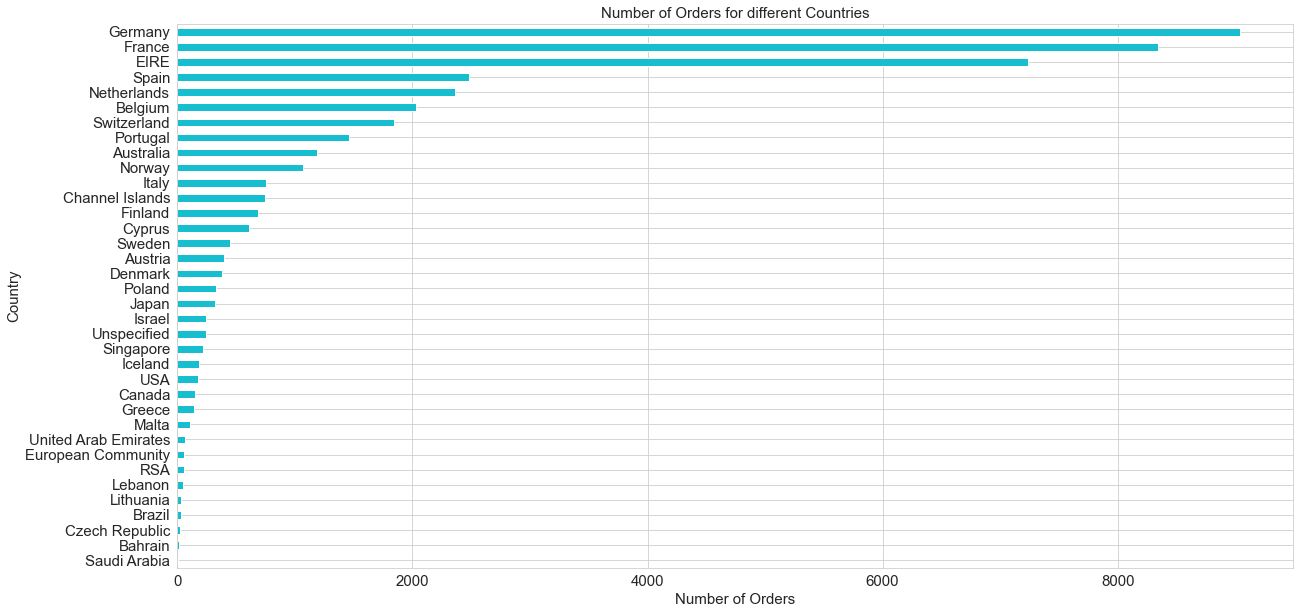

In [364]:
# plot number of unique customers in each country (with UK)
group_country_orders = df_new.groupby('Country')['InvoiceNo'].count().sort_values()
del group_country_orders['United Kingdom']

# plot number of unique customers in each country (without UK)
plt.subplots(figsize=(20,10))
group_country_orders.plot(kind='barh', fontsize=15, color=color[9])
plt.xlabel('Number of Orders', fontsize=15)
plt.ylabel('Country', fontsize=15)
plt.title('Number of Orders for different Countries', fontsize=15)
plt.show()

# 14. Orders trend across months

In [366]:
df_free = df_new[df_new.UnitPrice == 0]

In [367]:
df_free.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,InvoiceDate,year_month,month,day,hour,amount_spent,CustomerID,Country
9302,537197,22841,round cake tin vintage green,1,0.0,2010-12-05 14:02:00,201012,12,7,14,0.0,12647,Germany
33576,539263,22580,advent calendar gingham sack,4,0.0,2010-12-16 14:36:00,201012,12,4,14,0.0,16560,United Kingdom
40089,539722,22423,regency cakestand 3 tier,10,0.0,2010-12-21 13:45:00,201012,12,2,13,0.0,14911,EIRE
47068,540372,22090,paper bunting retrospot,24,0.0,2011-01-06 16:41:00,201101,1,4,16,0.0,13081,United Kingdom
47070,540372,22553,plasters in tin skulls,24,0.0,2011-01-06 16:41:00,201101,1,4,16,0.0,13081,United Kingdom


In [368]:
df_free.year_month.value_counts().sort_index()

201012     3
201101     3
201102     1
201103     2
201104     2
201105     2
201107     2
201108     6
201109     2
201110     3
201111    14
Name: year_month, dtype: int64

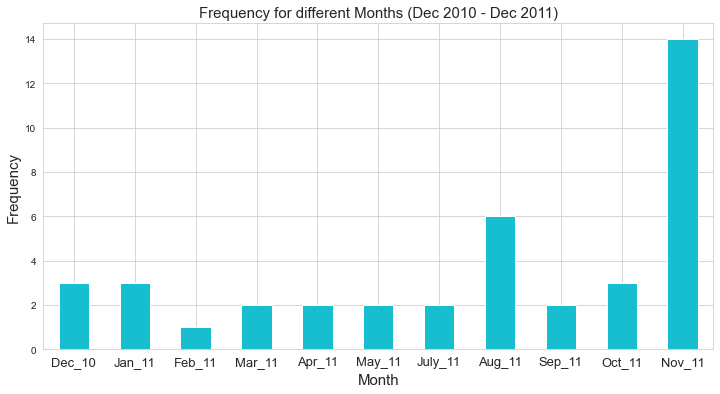

In [369]:
ax = df_free.year_month.value_counts().sort_index().plot(kind='bar',figsize=(12,6), color=color[9])
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ax.set_title('Frequency for different Months (Dec 2010 - Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11'), rotation='horizontal', fontsize=13)
plt.show()

In the Month of November 2011 has the highest order trend followed ny August 2011 

# 15. How much money spent by each country?

In [374]:
group_country_amount_spent = df_new.groupby('Country')['amount_spent'].sum().sort_values()
group_country_amount_spent

Country
Saudi Arabia            1.459200e+02
Bahrain                 5.484000e+02
Czech Republic          8.267400e+02
RSA                     1.002310e+03
Brazil                  1.143600e+03
European Community      1.300250e+03
Lithuania               1.661060e+03
Lebanon                 1.693880e+03
United Arab Emirates    1.902280e+03
Unspecified             2.667070e+03
Malta                   2.725590e+03
USA                     3.580390e+03
Canada                  3.666380e+03
Iceland                 4.310000e+03
Greece                  4.760520e+03
Israel                  7.221690e+03
Poland                  7.334650e+03
Austria                 1.019868e+04
Cyprus                  1.359038e+04
Italy                   1.748324e+04
Denmark                 1.895534e+04
Channel Islands         2.045044e+04
Singapore               2.127929e+04
Finland                 2.254608e+04
Portugal                3.343989e+04
Norway                  3.616544e+04
Japan                   3.7416

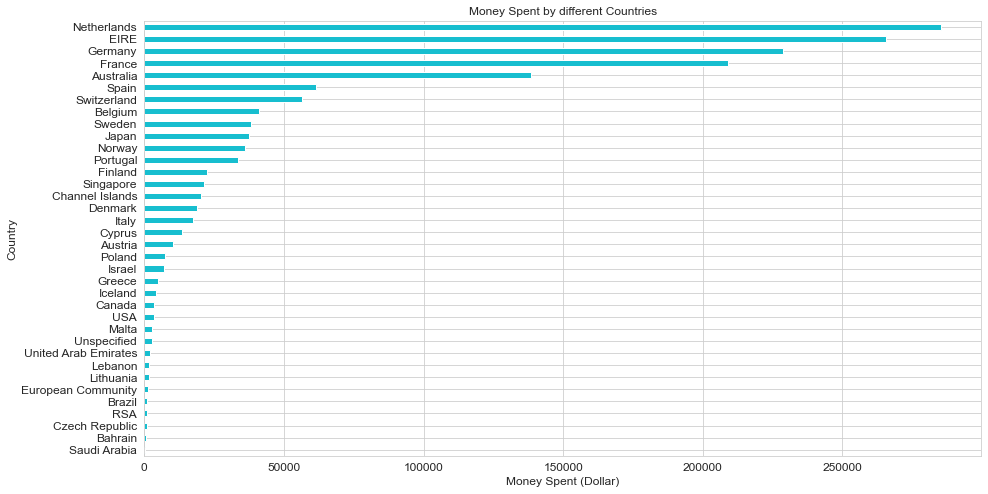

In [373]:
group_country_amount_spent = df_new.groupby('Country')['amount_spent'].sum().sort_values()
del group_country_amount_spent['United Kingdom']

# plot number of unique customers in each country (without UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind='barh', fontsize=12, color=color[9])
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()